In [ ]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
import matplotlib.pyplot as plt
from google.colab import files

def objective_function(variables):
    return 1

def adjacency_constraint(variables):
    x_values = variables[: n]
    y_values = variables[n: ]
    constraints = []
    for k1, k2 in adjacency:
        distance = np.sqrt((x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2)
        constraints.append(distance - (r[k1] + r[k2]))
    return np.array(constraints)

def no_overlap(variables):
    x_values = variables[: n]
    y_values = variables[n: ]
    constraints = []
    for i in range(n):
        for j in range(i + 1, n):
            if (i, j) not in adjacency:
                distance = np.sqrt((x_values[i] - x_values[j]) ** 2 + (y_values[i] - y_values[j]) ** 2)
                constraints.append((r[i] + r[j]) - distance)
    return np.array(constraints)

def fixed(variables):
    y_values = variables[n: ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index] - 99999)
    return np.array(constraints)

def boundaries(variables):
    y_values = variables[n: ]
    constraints = []
    for index in range(n):
        if index not in gamma:
            constraints.append(99999 - y_values[index] + r[index])
    return np.array(constraints)

def plot_intermediate(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Intermediate Plot")
    plt.axis("equal")
    plt.show()

def plot(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    min_x, min_y, max_x, max_y = optimal_x[0] - r[0], optimal_y[0] - r[0], optimal_x[0] + r[0], optimal_y[0] + r[0]
    for index in range(n):
        min_x = min(min_x, optimal_x[index] - r[index])
        max_x = max(max_x, optimal_x[index] + r[index])
        min_y = min(min_y, optimal_y[index] - r[index])
        max_y = max(max_y, optimal_y[index] + r[index])

    rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, color="red", linestyle="--", linewidth=2)
    ax.add_patch(rect)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Final Plot with Bounding Box")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    sizes, indices, mapping = {}, {}, {}
    adjacency, gamma, anchors = set(), set(), set()
    print("Upload the file sizes.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                sizes[str_value] = float(size_value)
    r = [0 for x in range(len(sizes))]
    index = len(sizes) - 1
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                current = line.strip()
                print(current)
                indices[current] = index
                anchors.add(current)
                mapping[index] = current
                r[index] = sizes[current]
                index -= 1
    index = 0
    for key in sizes:
        if key not in anchors:
            indices[key] = index
            mapping[index] = key
            r[index] = sizes[key]
            index += 1
    print("Upload the file edges.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("edges.txt", "r") as file:
            for line in file:
                key1, key2 = line.strip().split(",")
                index1, index2 = indices[key1], indices[key2]
                if index1 > index2:
                    index1, index2 = index2, index1
                adjacency.add((index1, index2))
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.add(indices[line.strip()])
    return len(sizes), r, gamma, adjacency, mapping

def callback_function(xk, state):
    optimal_x = xk[: n]
    optimal_y = xk[n :]
    plot_intermediate(optimal_x, optimal_y, r, mapping)

if __name__ == "__main__":
    n, r, gamma, adjacency, mapping = generate_inputs()
    print(n, r, adjacency, gamma, mapping)
    initial_guess = [0.0] * (2 * n)

    constraints = [
        NonlinearConstraint(fun=adjacency_constraint, lb=0, ub=0),
        NonlinearConstraint(fun=no_overlap, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=fixed, lb=0, ub=0),
        NonlinearConstraint(fun=boundaries, lb=-np.inf, ub=0)
    ]

    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

    plot(result.x[:n], result.x[n:], r, mapping)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, NonlinearConstraint
import matplotlib.pyplot as plt
from google.colab import files

def objective_function(variables):
    return 1

def adjacency_constraint(variables):
    x_values = variables[: n]
    y_values = variables[n: ]
    constraints = []
    for k1, k2 in adjacency:
        distance = np.sqrt((x_values[k1] - x_values[k2]) ** 2 + (y_values[k1] - y_values[k2]) ** 2)
        constraints.append(distance - (r[k1] + r[k2]))
    return np.array(constraints)

def no_overlap(variables):
    x_values = variables[: n]
    y_values = variables[n: ]
    constraints = []
    for i in range(n):
        for j in range(i + 1, n):
            if (i, j) not in adjacency:
                distance = np.sqrt((x_values[i] - x_values[j]) ** 2 + (y_values[i] - y_values[j]) ** 2)
                constraints.append((r[i] + r[j]) - distance)
    return np.array(constraints)

def fixed(variables):
    y_values = variables[n: ]
    constraints = []
    for index in gamma:
        constraints.append(y_values[index])
    return np.array(constraints)

def boundaries(variables):
    y_values = variables[n: ]
    constraints = []
    for index in range(n):
        if index not in gamma:
            constraints.append(-y_values[index])
    return np.array(constraints)

def plot_intermediate(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Intermediate Plot")
    plt.axis("equal")
    plt.show()

def plot(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    min_x, min_y, max_x, max_y = optimal_x[0] - r[0], optimal_y[0] - r[0], optimal_x[0] + r[0], optimal_y[0] + r[0]
    for index in range(n):
        min_x = min(min_x, optimal_x[index] - r[index])
        max_x = max(max_x, optimal_x[index] + r[index])
        min_y = min(min_y, optimal_y[index] - r[index])
        max_y = max(max_y, optimal_y[index] + r[index])

    rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, color="red", linestyle="--", linewidth=2)
    ax.add_patch(rect)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Final Plot with Bounding Box")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    sizes, indices, mapping = {}, {}, {}
    adjacency, gamma = set(), set()
    r = []
    print("Upload the file sizes.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                sizes[str_value] = float(size_value)
    index = 0
    for key in sizes:
        indices[key] = index
        mapping[index] = key
        r.append(sizes[key])
        index += 1
    n = index
    print("Upload the file edges.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("edges.txt", "r") as file:
            for line in file:
                key1, key2 = line.strip().split(",")
                index1, index2 = indices[key1], indices[key2]
                if index1 > index2:
                    index1, index2 = index2, index1
                adjacency.add((index1, index2))
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.add(indices[line.strip()])
    return n, r, gamma, adjacency, mapping

def callback_function(xk, state):
    optimal_x = xk[: n]
    optimal_y = xk[n :]
    plot_intermediate(optimal_x, optimal_y, r, mapping)

if __name__ == "__main__":
    n, r, gamma, adjacency_set, mapping = generate_inputs()
    initial_guess = [14619.219052970371, 14319.027229630452, 11081.114656864114, 12083.27202787137, 12080.970594286904, 11499.485358535612, 11956.203408277775, 10619.287778975284, 10463.346488088391, 13473.98786835797, 12619.23140673353, 10618.142508096964, 7981.514319123627, 11080.756104344959, 15691.415212655176, 11619.28542291025, 13619.222475915716, 7261.227162328537, 7274.759800821099, 9526.586981062092, 9483.473130921884, 13451.410963329658, 17637.30096807337, 7893.541230585341, 13702.246726082712, 12959.867708653224, 12576.03341891312, 8972.484110585476, 8593.434881616327, 5730.408486616506, 5656.19970764768, 4010.5803804065085, 5376.724977927582, 1366.2404374215703, 335.4272120891162, 914.350159546686, 0.017011749470909044, 1094.877328999449, 0.005463183577101907, 3379.004942940979, 3931.502709647809, 290.98174429977485, 1.6472937490993902, 1589.765117917638, 3023.617054789009, 169.50252881683514, 0.021202153757342853, 3660.4030533922105, 11572.49269768316, 14624.398352801016, 10401.726607475099, 10526.651585936681, 11054.631001396196, 12445.18134133875, 8890.493879081465, 12661.852522547026, 0.008692629969864396, 1715.6291488980332, 10080.821045205292, 793.730606760657, 7101.484187164353, 5718.361727459191, 4010.573949611935, 2866.57290736362, 2077.587962098813] + [8794.163290314957, 7599.353901654002, 2094.966365883572, 2710.80920482844, 3094.7988720893163, 4058.7040991522053, 970.3627654659862, 9985.22124451551, 3477.3501213627405, 12321.519903315188, 6794.203255310983, 4795.368451652889, 4849.9053995899985, 2094.7538480392964, 4675.347851960478, 5794.184803354532, 7794.182787917753, 3257.6060420103513, 6857.75175531768, 1648.8064498473416, 6062.553103724904, 453.2996322821338, 1455.861189555151, 1287.8546297402459, 2711.8070046390817, 1969.3798948930807, 1585.5478760003487, 2203.0232524244134, 4188.4745966362525, 8000.126691150742, 10577.579378985061, 4991.1910820959365, 5989.274942617569, 7924.83674345529, 9260.037914322718, 5473.195785834791, 6923.289150278586, 3051.871706586115, 2364.647653518577, 1757.6850280995316, 3137.708854453284, 2845.3345040017484, 4492.433359227342, 757.7594213582757, 0.008655941781357795, 0.006957978973280191, 0.09605270875860261, 1.0801616318484772, 969.7330073967687, 4.868592441584268, 0.009969389660076843, 1265.340377057193, 0.03258914791830988, 0.017722247140058968, 648.806681589376, 0.06015418035938899, 0.008448662969520338, 1056.50834817803, 3213.6661289649333, 559.0897401048787, 12.887016246966823, 2207.797410627481, 9069.279501177663, 6636.171636178976, 3847.9549408773883]
    constraints = [
        NonlinearConstraint(fun=adjacency_constraint, lb=0, ub=0),
        NonlinearConstraint(fun=no_overlap, lb=-np.inf, ub=0),
        NonlinearConstraint(fun=fixed, lb=0, ub=0),
        NonlinearConstraint(fun=boundaries, lb=-np.inf, ub=0)
    ]

    result = minimize(
        fun=lambda variables: objective_function(variables),
        x0=initial_guess,
        constraints=constraints,
        method='trust-constr',
        callback=callback_function
    )

    plot(result.x[:n], result.x[n:], r, mapping)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.4 MB/s eta 0:00:00


Upload the file sizes.txt:


Saving sizes.txt to sizes (4).txt
Upload the file edges.txt:


Saving edges.txt to edges (3).txt
Upload the file anchors.txt:


Streaming output truncated to the last 5000 lines.
8795r 0.0000000e+00 7.03e+07 1.64e+04   0.9 5.06e+05  -3.9 4.77e-02 2.67e-01f  1
8796r 0.0000000e+00 7.03e+07 1.56e+04   0.9 1.59e+06  -4.4 4.39e-04 4.86e-02f  1
8797r 0.0000000e+00 7.03e+07 1.47e+04   0.9 5.75e+05  -3.9 1.38e-02 5.85e-02f  1
8798r 0.0000000e+00 7.03e+07 1.40e+04   0.9 1.82e+06  -4.4 2.07e-03 4.59e-02f  1
8799r 0.0000000e+00 7.03e+07 1.40e+04   0.9 6.51e+05  -4.0 1.46e-02 1.11e-03f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
8800r 0.0000000e+00 7.03e+07 1.40e+04   0.9 2.01e+06  -4.5 9.99e-02 4.45e-05f  1
8801r 0.0000000e+00 7.03e+07 1.12e+04   0.9 7.18e+05  -4.0 1.71e-01 2.02e-01f  1
8802r 0.0000000e+00 7.03e+07 1.05e+04   0.9 2.29e+06  -4.5 2.20e-03 5.89e-02f  1
8803r 0.0000000e+00 7.03e+07 1.05e+04   0.9 8.27e+05  -4.1 1.34e-04 1.94e-03f  1
8804r 0.0000000e+00 7.03e+07 1.05e+04   0.9 3.04e+05  -3.7 4.70e-01 5.59e-05f  1
8805r 0.0000000e+00 7.03e+07 1.04e+04   0.9 8.94e+05  -4.1

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


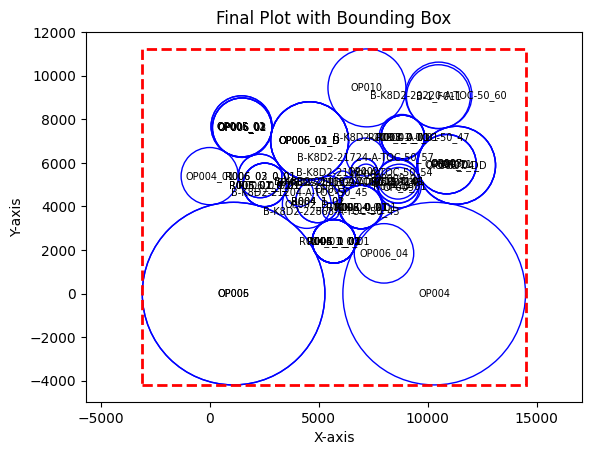

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt
from google.colab import files

def non_linear_constraint(model, i, j):
    if i >= j:
        return Constraint.Skip
    distance = pow((model.x[i] - model.x[j]), 2) + pow((model.y[i] - model.y[j]), 2)
    if (i, j) in adjacency:
        return distance - pow((model.r[i] + model.r[j]), 2) == 0
    return pow((model.r[i] + model.r[j]), 2) - distance <= 0

def fixed_constraint(model, index):
    return model.y[index] == 0

def plot(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    min_x, min_y, max_x, max_y = optimal_x[0] - r[0], optimal_y[0] - r[0], optimal_x[0] + r[0], optimal_y[0] + r[0]
    for index in range(n):
        min_x = min(min_x, optimal_x[index] - r[index])
        max_x = max(max_x, optimal_x[index] + r[index])
        min_y = min(min_y, optimal_y[index] - r[index])
        max_y = max(max_y, optimal_y[index] + r[index])

    rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, color="red", linestyle="--", linewidth=2)
    ax.add_patch(rect)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Final Plot with Bounding Box")
    plt.axis("equal")
    plt.show()

def plot_intermediate(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Intermediate Plot")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    sizes, indices, mapping = {}, {}, {}
    adjacency = set()
    r, gamma= [], []
    print("Upload the file sizes.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                sizes[str_value] = float(size_value)
    index = 0
    for key in sizes:
        indices[key] = index
        mapping[index] = key
        r.append(sizes[key])
        index += 1
    n = index
    print("Upload the file edges.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("edges.txt", "r") as file:
            for line in file:
                key1, key2 = line.strip().split(",")
                index1, index2 = indices[key1], indices[key2]
                if index1 > index2:
                    index1, index2 = index2, index1
                adjacency.add((index1, index2))
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(indices[line.strip()])
    return n, r, gamma, adjacency, mapping

n, r, gamma, adjacency, mapping = generate_inputs()
model = ConcreteModel()

model.Nodes = Set(initialize=range(n))
model.Gamma = Set(initialize=gamma)

model.x = Var(model.Nodes, within=NonNegativeReals)
model.y = Var(model.Nodes, within=NonNegativeReals)
model.r = Param(model.Nodes, initialize=lambda model, i: r[i])

model.non_linear_constraints = Constraint(model.Nodes, model.Nodes, rule=non_linear_constraint)
model.fixed_constraints = Constraint(model.Gamma, rule=fixed_constraint)

solver = SolverFactory("ipopt", options={"max_iter": 30000})
solver.solve(model, tee=True)

optimal_x = [value(model.x[i]) for i in model.Nodes]
optimal_y = [value(model.y[i]) for i in model.Nodes]

print(optimal_x, optimal_y)
plot(optimal_x, optimal_y, r, mapping)

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt
from google.colab import files

def non_linear_constraint(model, i, j):
    if i >= j:
        return Constraint.Skip
    distance = abs(model.x[i] - model.x[j]) + abs(model.y[i] - model.y[j])
    if (i, j) in adjacency:
        return distance - (model.r[i] + model.r[j]) == 0
    return (model.r[i] + model.r[j]) - distance <= 0

def fixed_constraint(model, index):
    return model.y[index] == 0

def plot(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    min_x, min_y, max_x, max_y = optimal_x[0] - r[0], optimal_y[0] - r[0], optimal_x[0] + r[0], optimal_y[0] + r[0]
    for index in range(n):
        min_x = min(min_x, optimal_x[index] - r[index])
        max_x = max(max_x, optimal_x[index] + r[index])
        min_y = min(min_y, optimal_y[index] - r[index])
        max_y = max(max_y, optimal_y[index] + r[index])

    rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, color="red", linestyle="--", linewidth=2)
    ax.add_patch(rect)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Final Plot with Bounding Box")
    plt.axis("equal")
    plt.show()

def plot_intermediate(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Intermediate Plot")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    sizes, indices, mapping = {}, {}, {}
    adjacency = set()
    r, gamma= [], []
    print("Upload the file sizes.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("sizes.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                sizes[str_value] = float(size_value)
    index = 0
    for key in sizes:
        indices[key] = index
        mapping[index] = key
        r.append(sizes[key])
        index += 1
    n = index
    print("Upload the file edges.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("edges.txt", "r") as file:
            for line in file:
                key1, key2 = line.strip().split(",")
                index1, index2 = indices[key1], indices[key2]
                if index1 > index2:
                    index1, index2 = index2, index1
                adjacency.add((index1, index2))
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors.txt", "r") as file:
            for line in file:
                gamma.append(indices[line.strip()])
    return n, r, gamma, adjacency, mapping

n, r, gamma, adjacency, mapping = generate_inputs()
model = ConcreteModel()

model.Nodes = Set(initialize=range(n))
model.Gamma = Set(initialize=gamma)

model.x = Var(model.Nodes, within=NonNegativeReals)
model.y = Var(model.Nodes, within=NonNegativeReals)
model.r = Param(model.Nodes, initialize=lambda model, i: r[i])

model.non_linear_constraints = Constraint(model.Nodes, model.Nodes, rule=non_linear_constraint)
model.fixed_constraints = Constraint(model.Gamma, rule=fixed_constraint)

solver = SolverFactory("ipopt", options={"max_iter": 100000})
solver.solve(model, tee=True)

optimal_x = [value(model.x[i]) for i in model.Nodes]
optimal_y = [value(model.y[i]) for i in model.Nodes]

print(optimal_x, optimal_y)
plot(optimal_x, optimal_y, r, mapping)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.8 MB/s eta 0:00:00
Upload the file sizes.txt:


Saving sizes_test.txt to sizes_test.txt
Upload the file edges.txt:


Saving edges_test.txt to edges_test.txt
Upload the file anchors.txt:


Streaming output truncated to the last 5000 lines.
495476r 0.0000000e+00 6.90e+03 1.89e+03   0.3 2.39e+03    -  2.59e-01 3.39e-01h  1
495477r 0.0000000e+00 6.90e+03 1.89e+03   0.3 4.32e+04    -  1.04e-03 2.99e-05f  1
495478r 0.0000000e+00 6.97e+03 1.95e+03   0.3 3.48e+04    -  6.57e-04 2.90e-03f  1
495479r 0.0000000e+00 6.97e+03 1.95e+03   0.3 3.91e+04    -  2.81e-03 2.26e-05f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
495480r 0.0000000e+00 6.97e+03 1.95e+03   0.3 9.63e+04    -  3.37e-05 2.03e-04f  1
495481r 0.0000000e+00 6.97e+03 1.66e+03   0.3 5.90e+05    -  3.89e-05 2.91e-04f  1
495482r 0.0000000e+00 6.96e+03 2.10e+03   0.3 3.00e+03    -  7.15e-04 2.50e-02h  1
495483r 0.0000000e+00 6.96e+03 4.96e+03   0.3 6.93e+03    -  9.92e-03 1.72e-02h  1
495484r 0.0000000e+00 6.96e+03 4.96e+03   0.3 5.34e+05    -  2.28e-06 3.54e-04f  1
495485r 0.0000000e+00 6.96e+03 4.95e+03   0.3 6.94e+03    -  1.59e-01 2.02e-03h  1
495486r 0.0000000e+00 6.95e+03 4.73e+0

  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.


[4717.922859629317, 4335.77931325393, 2099.7726203027487, 3717.7679060305873, 7214.7336543475485, 7215.116139367994, 3098.9541569772086, 9405.50072409933, 8214.751608385777, 4834.62689978638, 5834.628272320226, 4212.657943709237, 2900.1642566945193, 6736.1389797605425, 7214.248448415163, 6834.624933436585, 3212.766013596844, 5721.793899533975, 5834.622661654525, 1721.0546510145014, 1498.2808102937938, 0.0006617476419374458, 721.0529095276859, 1036.2906374039212, 4493.663409084915, 721.0723329885269, 3432.0660840618193, 524.0020853278847, 0.0011772644437167813, 5428.792207832089, 5432.0650268859135, 4432.067574030455, 5333.439406755093, 4036.275123068974, 4030.539086448083, 2721.048632302568, 2433.7766590204187, 2036.2807502464377, 1281.5065591471246, 3432.052528411789, 3097.8765612397, 3036.261249207781, 1998.2739184811119, 1753.4975517813727, 1037.9828912203286, 322.49607102571, 1000.0028870525763, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [5194.4280209026865, 6307.28446888305

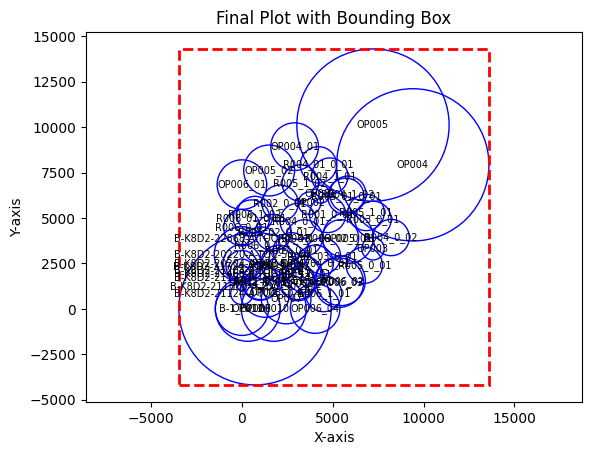

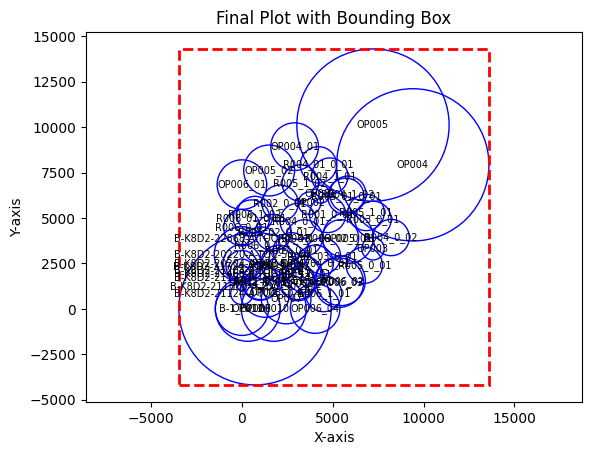

In [ ]:
!pip install pyomo
!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

from pyomo.environ import *
import matplotlib.pyplot as plt
from google.colab import files

def non_linear_constraint(model, i, j):
    if i >= j:
        return Constraint.Skip
    distance = abs(model.x[i] - model.x[j]) + abs(model.y[i] - model.y[j])
    radial = r[i] + r[j]
    if (i, j) in adjacency:
        return distance == radial
    return distance >= radial

def plot(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    min_x, min_y, max_x, max_y = optimal_x[0] - r[0], optimal_y[0] - r[0], optimal_x[0] + r[0], optimal_y[0] + r[0]
    for index in range(n):
        min_x = min(min_x, optimal_x[index] - r[index])
        max_x = max(max_x, optimal_x[index] + r[index])
        min_y = min(min_y, optimal_y[index] - r[index])
        max_y = max(max_y, optimal_y[index] + r[index])

    rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, color="red", linestyle="--", linewidth=2)
    ax.add_patch(rect)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Final Plot with Bounding Box")
    plt.axis("equal")
    plt.show()

def plot_intermediate(optimal_x, optimal_y, r, mapping):
    fig, ax = plt.subplots()
    for i in range(n):
        circle = plt.Circle((optimal_x[i], optimal_y[i]), r[i], fill=False, color="blue")
        ax.add_patch(circle)
        plt.text(optimal_x[i] + 0.2, optimal_y[i] + 0.2, mapping[i], fontsize=7, ha="center", va="center", color="black")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Intermediate Plot")
    plt.axis("equal")
    plt.show()

def generate_inputs():
    sizes, indices, mapping = {}, {}, {}
    adjacency, gamma = set(), set()
    r = []
    print("Upload the file sizes.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("sizes_test.txt", "r") as file:
            for line in file:
                str_value, size_value = line.strip().split(",")
                sizes[str_value] = float(size_value)
    index = 0
    for key in sizes:
        indices[key] = index
        mapping[index] = key
        r.append(sizes[key])
        index += 1
    n = index
    print("Upload the file edges.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("edges_test.txt", "r") as file:
            for line in file:
                key1, key2 = line.strip().split(",")
                index1, index2 = indices[key1], indices[key2]
                if index1 > index2:
                    index1, index2 = index2, index1
                adjacency.add((index1, index2))
    print("Upload the file anchors.txt:")
    uploaded_anchors = files.upload()
    for filename, content in uploaded_anchors.items():
        with open("anchors_test.txt", "r") as file:
            for line in file:
                gamma.add(indices[line.strip()])
    return n, r, gamma, adjacency, mapping

n, r, gamma, adjacency, mapping = generate_inputs()
model = ConcreteModel()
bounds = [(0, None) for x in range(n)]

for index in gamma:
    bounds[index] = (0, 0)

model.Nodes = Set(initialize=range(n))
model.x = Var(model.Nodes, bounds=bounds)
model.y = Var(model.Nodes, within=NonNegativeReals)

model.non_linear_constraints = Constraint(model.Nodes, model.Nodes, rule=non_linear_constraint)

solver = SolverFactory("ipopt", options={"max_iter": 500000})
solver.solve(model, tee=True)

optimal_x = [value(model.x[i]) for i in model.Nodes]
optimal_y = [value(model.y[i]) for i in model.Nodes]

print(optimal_x, optimal_y)
plot(optimal_x, optimal_y, r, mapping)
plot(optimal_x, optimal_y, r, mapping)